<a href="https://colab.research.google.com/github/sharadnatarajSJSU/CMPE-255-Clustering-Techniques/blob/main/Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One of the limitations of the K means clustering technique is that it does not work for non circular clusters. It is very apperent if the data is really close together in which case the cluster may be of different gemottrical shapes. K means clusters overlap and become inaccuarate for this time of data. Hence, in the real work it does not work very well.

To solve this we can use Gaussian Mixture models. A GMM tries to find multi dimensional gaussian probability distribution that is best able to model the data set. We can use this to perform either K means like clustering or we can use it find the probability of the point belonging to a certain cluster.

The GMM is also a E-M based model.
E-step: for each point, find weights encoding the probability of membership in each cluster
M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights

To demonstrate this we will generate a blob dataset by generating it .


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [16]:
from sklearn import datasets

In [19]:
X, y_true = datasets.make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]

In [20]:
X.shape

(1500, 2)

We will also transform X to streach the dataset in order to create contrast

In [23]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

In [25]:
X_stretched.shape

(1500, 2)

In [26]:
X

array([[ 5.41334556,  0.71517795],
       [ 5.1920962 ,  2.13003529],
       [ 5.21474403,  0.83105818],
       ...,
       [ 3.89011782,  1.79498919],
       [ 3.45660077, -1.59437027],
       [ 7.8010913 , -0.33399306]])

In [27]:
X_stretched

array([[-3.88824445,  4.4035241 ],
       [-3.79359398,  4.87600378],
       [-3.7519196 ,  4.30618106],
       ...,
       [-2.85116615,  3.74323828],
       [-2.39149572,  1.88511328],
       [-5.54256087,  5.72929815]])

Let us first apply K means

In [30]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [31]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

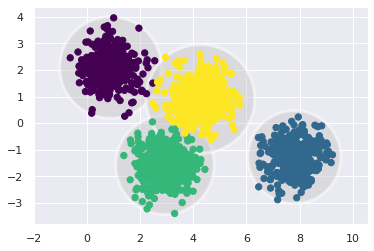

In [32]:
kmeans = KMeans(n_clusters=4, random_state=0) #We only genreated data with 4 clusters
plot_kmeans(kmeans, X)

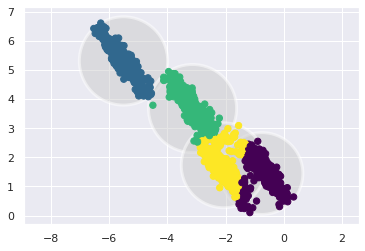

In [33]:
plot_kmeans(kmeans, X_stretched)

We can find the overlapping cluster on the bottom right hand side of the plot. 

Let us apply GMM to the same dataset

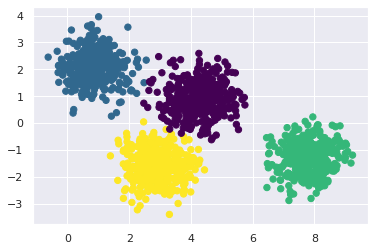

In [36]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

We can also get the probability distribution for each point cs cluster

In [37]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.002 0.    0.    0.998]
 [0.    0.    1.    0.   ]]


Let us apply the GMM to the streached dataset

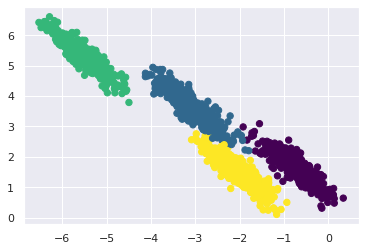

In [39]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X_stretched)
labels = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis');

We now have well defined, obleque clusters which was simply not possible in K means.